# Process mining with pm4py

In [1]:
import deetly
import requests
import tempfile
import shutil
import pm4py
import pandas as pd

from pm4py.statistics.attributes.log import get as attributes_filter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.statistics.traces.log import case_statistics
from pm4py.visualization.graphs import visualizer as graphs_visualizer

In [2]:
# Create datapackage
description = """
# Process mining with pm4py
"""

package = {
    "name":"Process mining with pm4py", 
    "description":description, 
    "author":"deetly", 
    "theme":"example",
    "license": "MIT",
    "keyword": ["example, graph, graphviz"]
}

dp = deetly.package(package)

Missing mandatory props(s): ['title']
Missing recommended props(s): ['contactPoint', 'distribution', 'publisher', 'spatial', 'temporal']
Property not in DCAT schema: ['name', 'author', 'license']
Invalid type: ['String:name', 'String:description', 'String:author', 'String or list of strings:theme', 'String:license', 'String or list of strings:keyword', 'ISO date or datetime:issued', 'ISO date or datetime:modified']


In [3]:
url = 'https://storage.googleapis.com/vega-datasets/process-mining/receipt.xes'
with requests.get(url, stream=True) as r:
        fp = tempfile.NamedTemporaryFile()
        shutil.copyfileobj(r.raw, fp)
        
log = pm4py.read_xes(fp.name)
fp.close()

In [4]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

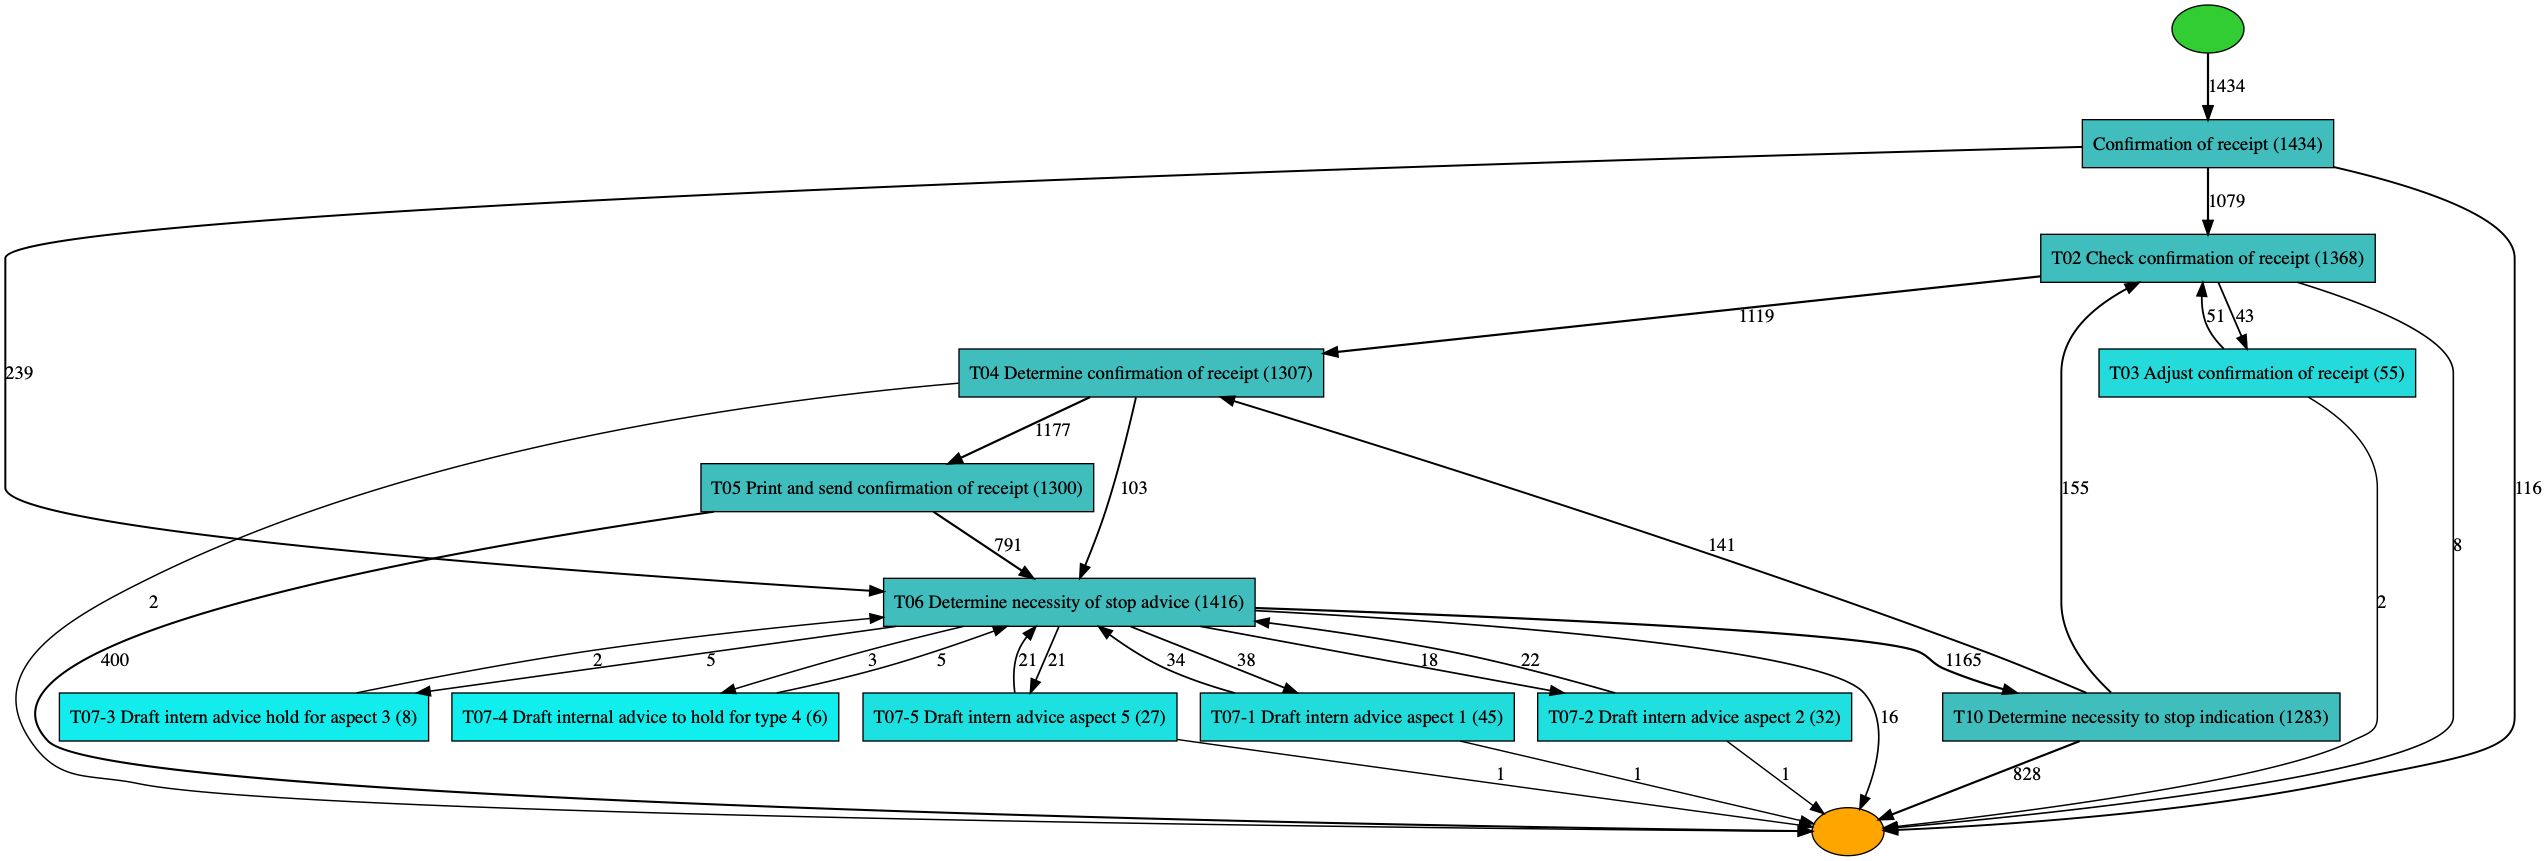

In [5]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

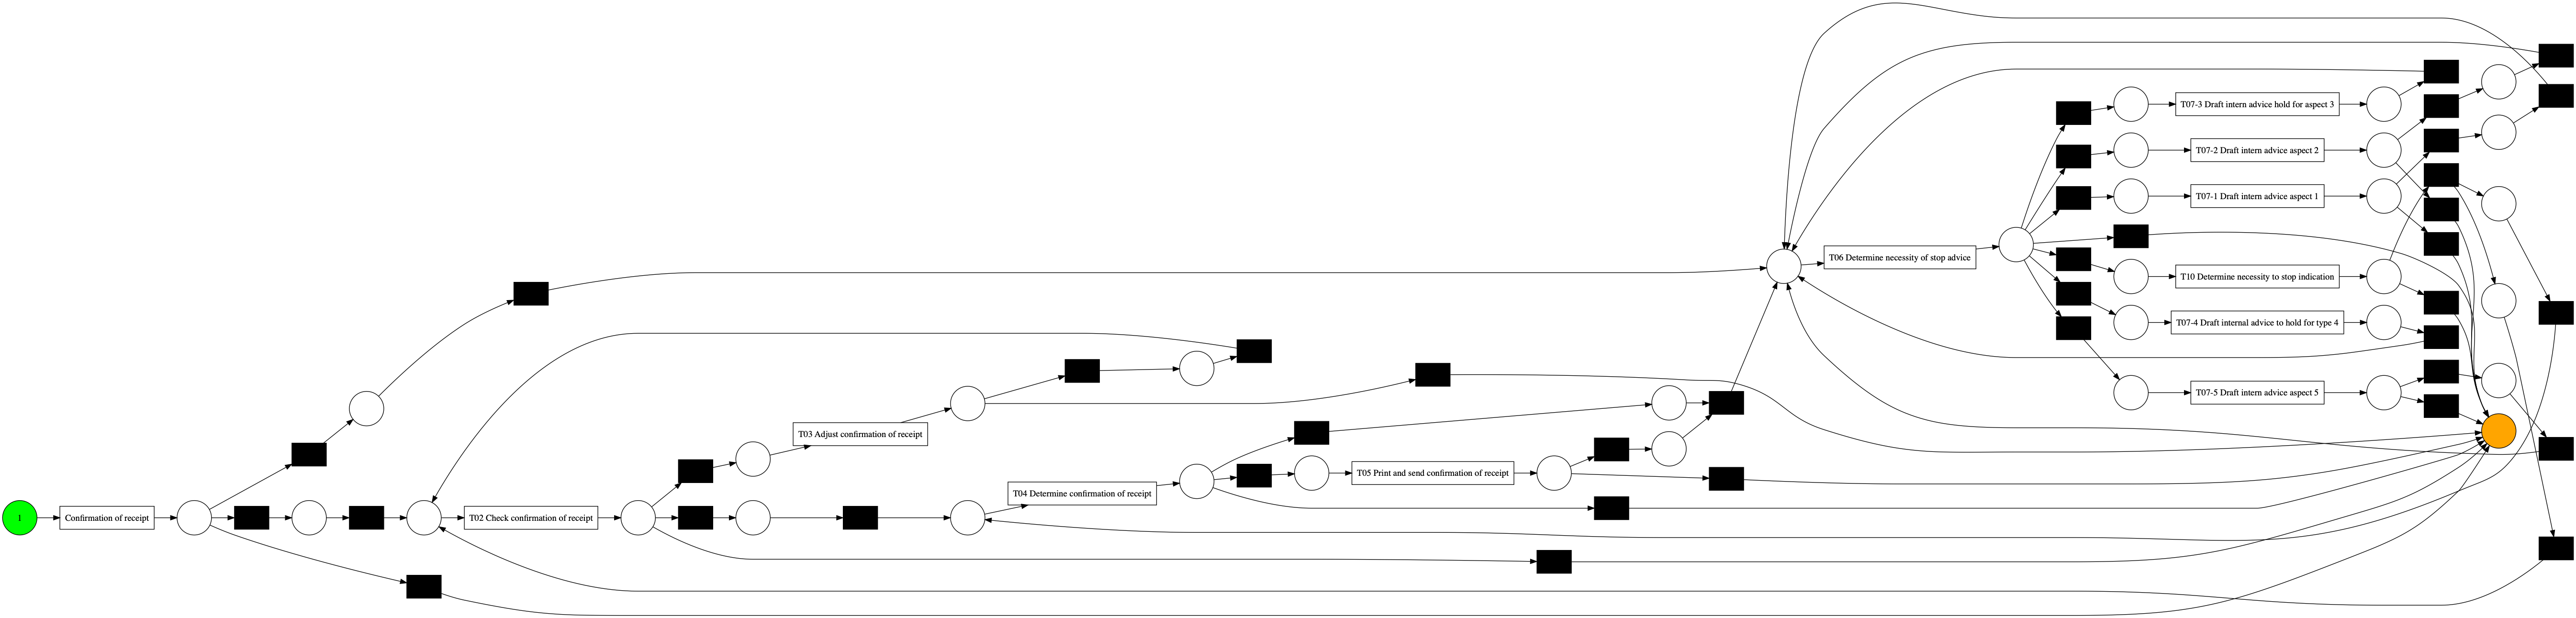

In [6]:
net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

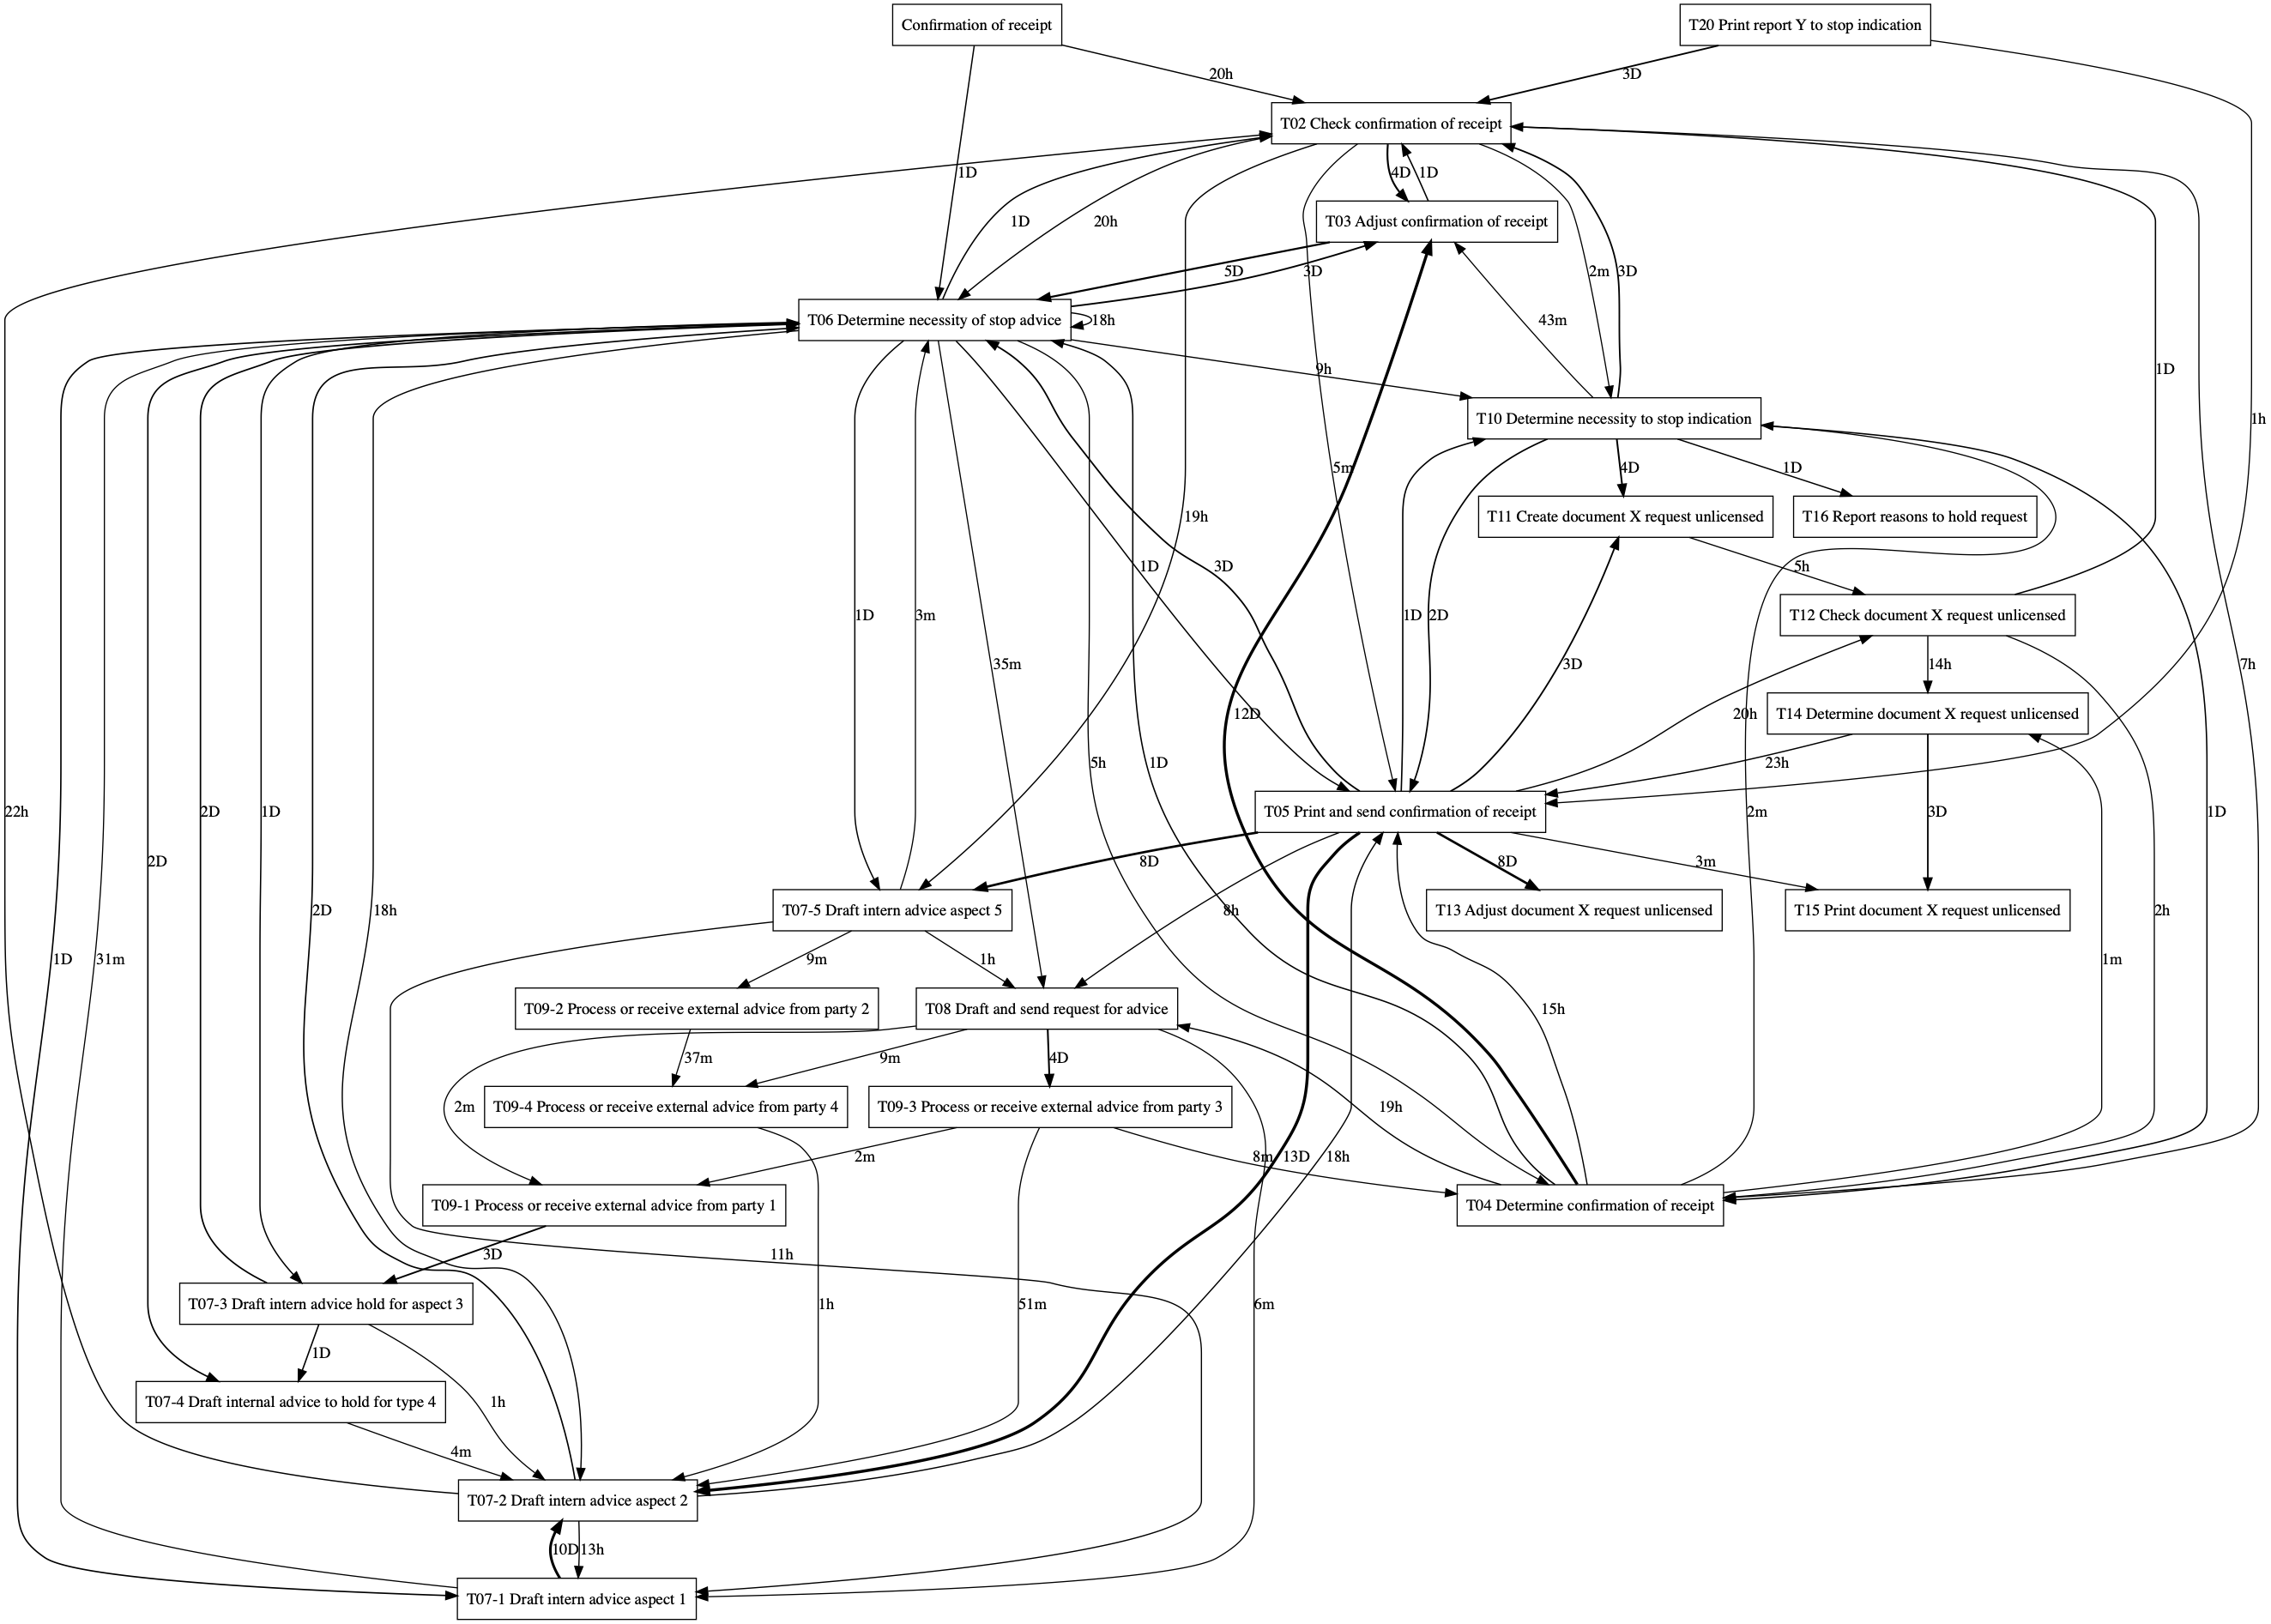

In [7]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg = dfg_discovery.apply(log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.PERFORMANCE)
dfg_visualization.view(gviz)

In [8]:
dp.graphviz(gviz.source, "Directly-Follows graph")

In [9]:
dp.publish()

View: https://public.deetly.com/examples/fb66cc1679f50ff5fbf7879f404caf23 

Metadata: https://storage.googleapis.com/deetly/examples/fb66cc1679f50ff5fbf7879f404caf23/datapackage.json 

